# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading and visualizing data 1/1
2. Logistic classifier 2/2
3. Bootstrapped accuracy 3/3
4. Permutation test for grey matter effects 3/3
5. Reflection 1/1


---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# WRITE YOUR CODE HERE
library(tidyverse)
system("gdown --id 1KHDMU8u_B3DHN2NV9ESy3TQaW0WafxXz")
#list.files()

#save to data frame called "dat"
dat <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

#head(dat)
#colnames(dat)

d1<-dat%>%
  select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol)%>%
  na.omit()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
2,100206,M,130.42,1864518,543134,807245
3,100307,F,112.56,1512540,407292,664124
4,100408,M,121.18,1684117,500417,726206
5,100610,M,126.53,1816044,512946,762308
6,101006,F,101.85,1437868,429449,579632
7,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

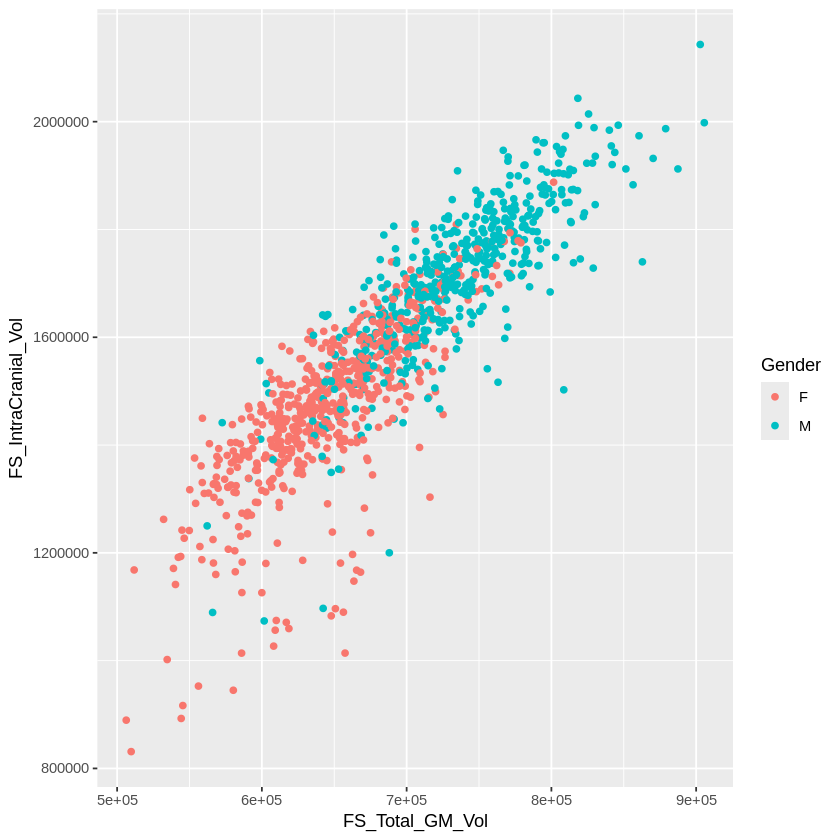

In [ ]:
# WRITE YOUR CODE HERE
ggplot(d1,aes(x=FS_Total_GM_Vol,y=FS_IntraCranial_Vol,col=Gender)) +
 geom_point()


What patterns do you observe in the scatter plot?

> *Write your response here*
> It looks like there is generally a linear relationship between FS_Total_GM_Vol and FS_IntraCranial_Vol. Further it looks like, generally, for Male's, there is a higher FS_Total_GM_Vol and FS_IntraCranial_Vol.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [ ]:
# WRITE YOUR CODE HERE
d1$Gender<-factor(d1$Gender, levels = c("F","M"))
glm.fit<-glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=d1, family=binomial) # logistic regression
summary(glm.fit)
#d1$Gender


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Write your response here*
> It looks like the FS_Total_GM_Vol and FS_IntraCranial_Vol variables are significantly associated with gender (with p-values that are significant at any (common) significance level -- very close to 0)

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [ ]:
# WRITE YOUR CODE HERE
glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
num_observations = nrow(glm_prob_df)

threshold = 0.50 #binarizing threshold

# First make a list of "Female"
glm_prob_df$predicted_binary=rep("F",num_observations)

# Then use the probability output to label M. Let's use a threshold of 50% probability.
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="M" #find the rows that have prob > threshold and cast as 'M'

# Now let's look at the prediction accuracy
confusion_df = data.frame(glm_prob_df$predicted_binary, d1$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted   F   M
        F 516 110
        M  90 397

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

>*Write your response here*

> The prediction accuracy for gender is ~82%

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


[1] 0.8203055

ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 -0.000195867  0.01233898


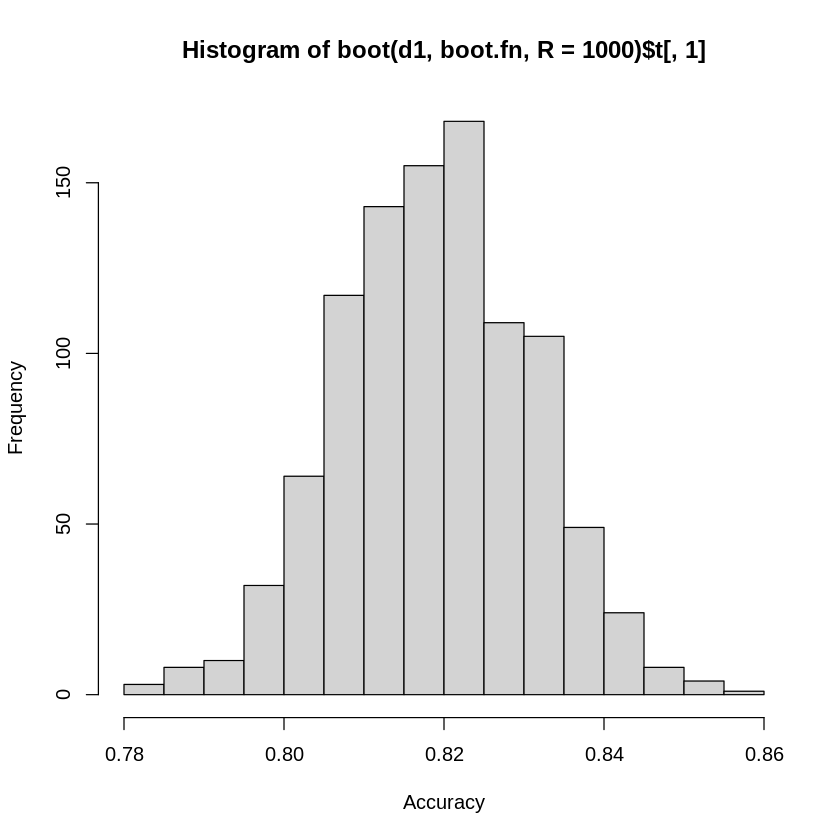

In [ ]:
# WRITE YOUR CODE HERE
library(boot)
#define boot function
boot.fn <- function(data, index){
    glm.fit<-glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=data, subset=index, family=binomial)
    glm_prob_df = data.frame(predict(glm.fit, type = "response"))
    colnames(glm_prob_df) = c('predicted_prob')
    num_observations = nrow(glm_prob_df)
    threshold = 0.50 #binarizing threshold
    # First make a list of "Female"
    glm_prob_df$predicted_binary=rep("F",num_observations)
    # Then use the probability output to label M. Let's use a threshold of 50% probability.
    glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="M" #find the rows that have prob > threshold and cast as 'M'

    Accuracy<-mean(glm_prob_df$predicted_binary == d1[index,]$Gender)
    # return: throw this as output
    return(Accuracy)}

print(boot.fn(d1, 1:nrow(d1)))

boot_obj = boot(d1 ,boot.fn ,R=1000) #R=repetitions
print(boot_obj)

hist(boot(d1 ,boot.fn ,R=1000)$t[,1], xlab="Accuracy")

How robust is the prediction accuracy of the full model?

> *Write your response here*
>
The prediction of the full model looks pretty robust, the bootstrapped distirbution seems pretty tightly centered around 0.82 with no accuracy falling below 0.78 across the 1000 bootstrap samples (which certainly seems better than random guessing).
The 95% CI for accuracy based off of the standard deviation from the bootstrap is 0.8203 +/- 1.96*0.0123 which is (0.7962, 0.8444)

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

[1] 1

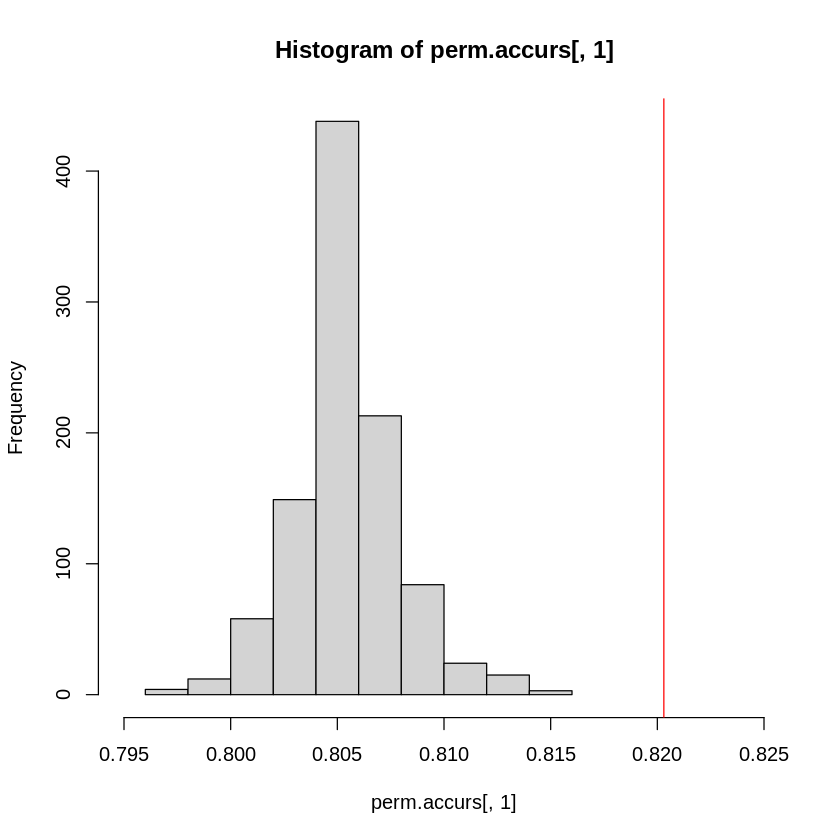

In [ ]:
# WRITE YOUR CODE HERE
# First let's make a copy of the data set that we'll keep permuting
permd1 = d1 #want to preserve the non-permuted, true form of data!

# Set the number of iterations
R=1000

# Next smake an output object to store the results
perm.accurs=matrix(NA,nrow=R, ncol=1) #filling with nas at first

# Now just write a for loop where we scramble the observations
# in X using the sample() function. We'll scramble the observations in R different ways
for (i in 1:R){
  permd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(nrow(d1))] # This is a shuffled version of the d1$FS_Total_GM_Vol vector

  glm.fit<-glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data=permd1, family=binomial)
  glm_prob_df = data.frame(predict(glm.fit, type = "response"))
  colnames(glm_prob_df) = c('predicted_prob')
  num_observations = nrow(glm_prob_df)
  threshold = 0.50 #binarizing threshold
  # First make a list of "Female"
  glm_prob_df$predicted_binary=rep("F",num_observations)
  # Then use the probability output to label M. Let's use a threshold of 50% probability.
  glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="M" #find the rows that have prob > threshold and cast as 'M'

  Accuracy<-mean(glm_prob_df$predicted_binary == d1$Gender)

  perm.accurs[i,]=Accuracy
}

# Take a look at the null distributions
hist(perm.accurs[,1], xlim=c(0.795,0.825))

perm.real<-boot.fn(d1, 1:nrow(d1))

abline(v = perm.real, col = "red")
perm.p = sum(perm.accurs[,1]<perm.real[1])/R
perm.p


How much does the grey matter volume influence the prediction accuracy of the model?

> *Write your response here*
>
It seems that grey matter volume significantly influences (improves) the prediction accuracy of the model. The real effect of grey matter volume on the prediction accuracy of the model is larger than the range of the null distribution (prediction accuracies with randomly permuted grey matter volumen).

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *Write your response here*
>
A bootstrap test resamples your data and calculates your parameter estimates for each of those samples. It's helpful if you want to create a confidence interval for your parameter estimate.

A permutation test tries to break correlation in your data by randomly permuting values in a certain predictor/variable. That way you can generate a distibution of what a parameter would be in the absence of any relationship. In this way, you can use permutation tests to test if the effect you're seeing is truly due to the relationship between the outcome of interest and your predictor variable.

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*